# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 04 · Notebook 03 — Descriptive Statistics
**Instructor:** Amir Charkhi  |  **Goal:** Master descriptive statistics to understand and summarize your data like a pro.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Calculate and interpret measures of central tendency (mean, median, mode)
- Calculate and interpret measures of variability (variance, standard deviation)
- Understand when to use different measures
- Calculate z-scores and identify outliers
- Create professional summary statistics tables

## 1. The Statistics Toolkit
**Your data compass**: These numbers tell you where your data lives and how it behaves!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [2]:
# Real employee salary data with a story
np.random.seed(42)
salaries = np.array([45000, 52000, 48000, 67000, 71000, 58000, 62000, 55000, 
                    49000, 73000, 46000, 59000, 68000, 54000, 61000, 
                    47000, 65000, 70000, 53000, 150000])  # 👀 Spot the outlier!

print(f"💰 Company Salary Data ({len(salaries)} employees)")
print(f"Range: ${min(salaries):,} to ${max(salaries):,}")
print(f"First 10 salaries: {salaries[:10]}")

💰 Company Salary Data (20 employees)
Range: $45,000 to $150,000
First 10 salaries: [45000 52000 48000 67000 71000 58000 62000 55000 49000 73000]


## 2. Central Tendency: Finding the "Center"

### 2.1 Mean: The Classic Average

In [3]:
# Mean calculation
mean_salary = np.mean(salaries)
print(f"📊 Mean salary: ${mean_salary:,.2f}")

# Show the math behind it
manual_mean = sum(salaries) / len(salaries)
print(f"📝 Manual calculation: ${manual_mean:,.2f}")
print(f"\n💡 Formula: (sum of all values) ÷ (number of values)")

📊 Mean salary: $62,650.00
📝 Manual calculation: $62,650.00

💡 Formula: (sum of all values) ÷ (number of values)


### 2.2 Median: The Middle Ground

In [4]:
# Median calculation
median_salary = np.median(salaries)
print(f"🎯 Median salary: ${median_salary:,.2f}")

# Show the sorted data
sorted_salaries = np.sort(salaries)
middle_pos = len(salaries) // 2
print(f"\n📋 Sorted salaries (middle at position {middle_pos}):")
print(f"First 5: {sorted_salaries[:5]}")
print(f"Last 5: {sorted_salaries[-5:]}")
print(f"\n💡 Median = middle value when data is sorted")

🎯 Median salary: $58,500.00

📋 Sorted salaries (middle at position 10):
First 5: [45000 46000 47000 48000 49000]
Last 5: [ 68000  70000  71000  73000 150000]

💡 Median = middle value when data is sorted


### 2.3 Mode: The Popular Choice

In [5]:
# Mode calculation
mode_result = stats.mode(salaries, keepdims=True)
print(f"🔢 Mode: ${mode_result.mode[0]:,} (appears {mode_result.count[0]} time)")

# Show value frequencies
unique, counts = np.unique(salaries, return_counts=True)
print(f"\n📈 Most values appear only once in this dataset")
print(f"💡 Mode is most useful for categorical data!")

🔢 Mode: $45,000 (appears 1 time)

📈 Most values appear only once in this dataset
💡 Mode is most useful for categorical data!


**Exercise 1 — The Outlier Effect (easy)**  
Compare mean vs median with and without the outlier.


In [19]:
# Your turn - remove the outlier and see what happens
salaries_no_outlier = salaries[salaries < 100000]  # Remove $150k salary

# Calculate both versions
mean_with = np.mean(salaries)
median_with = np.median(salaries)

# Without outlier
mean_without = np.mean(salaries_no_outlier)
median_without = np.median(salaries_no_outlier)

print("📊 Outlier Impact Analysis:")
print(f"Mean with outlier:    ${mean_with:,.0f}")
print(f"Mean without outlier: ${mean_without:,.0f}")
print(f"Difference: ${mean_with - mean_without:,.0f}")
print()
print(f"Median with outlier:    ${median_with:,.0f}")
print(f"Median without outlier: ${median_without:,.0f}")
print(f"Difference: ${median_with - median_without:,.0f}")

📊 Outlier Impact Analysis:
Mean with outlier:    $62,650
Mean without outlier: $58,053
Difference: $4,597

Median with outlier:    $58,500
Median without outlier: $58,000
Difference: $500


<details>
<summary><b>Solution</b></summary>

```python
# With outlier
mean_with = np.mean(salaries)
median_with = np.median(salaries)

# Without outlier
mean_without = np.mean(salaries_no_outlier)
median_without = np.median(salaries_no_outlier)

print("📊 Outlier Impact Analysis:")
print(f"Mean with outlier:    ${mean_with:,.0f}")
print(f"Mean without outlier: ${mean_without:,.0f}")
print(f"Difference: ${mean_with - mean_without:,.0f}")
print()
print(f"Median with outlier:    ${median_with:,.0f}")
print(f"Median without outlier: ${median_without:,.0f}")
print(f"Difference: ${median_with - median_without:,.0f}")
print()
print("🎯 Key insight: Median is much more robust to outliers!")
```
</details>

### 2.4 Visual Comparison

C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


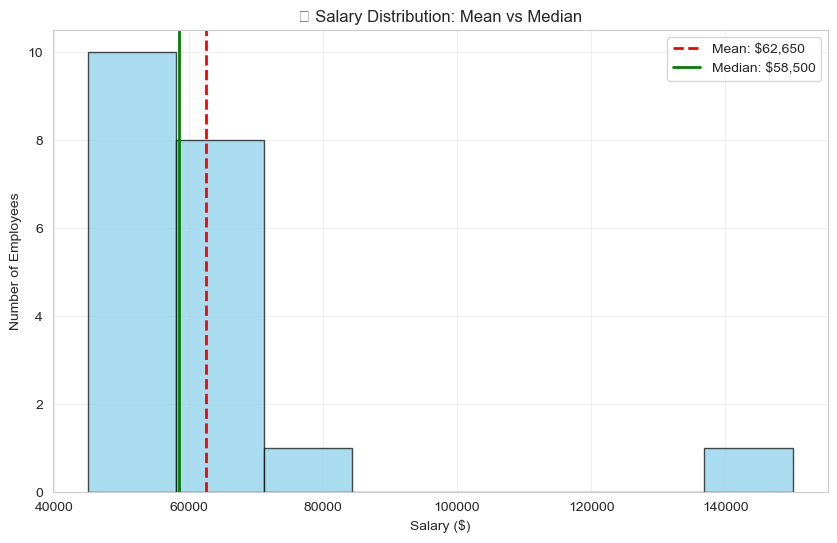

🔍 Notice: Mean is pulled right by the $150k outlier!


In [7]:
# Show all measures together
plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='-', linewidth=2, 
           label=f'Median: ${median_salary:,.0f}')

plt.title('💰 Salary Distribution: Mean vs Median')
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🔍 Notice: Mean is pulled right by the $150k outlier!")

## 3. Variability: How Spread Out Is Your Data?

### 3.1 Range: The Simplest Measure

In [8]:
# Range calculation
salary_range = np.max(salaries) - np.min(salaries)
print(f"📏 Salary range: ${salary_range:,}")
print(f"   Min: ${np.min(salaries):,}")
print(f"   Max: ${np.max(salaries):,}")
print(f"\n⚠️  Problem: Range is dominated by outliers!")

📏 Salary range: $105,000
   Min: $45,000
   Max: $150,000

⚠️  Problem: Range is dominated by outliers!


### 3.2 Standard Deviation: The Goldilocks Measure

In [9]:
# Standard deviation (the star of the show!)
sample_std = np.std(salaries, ddof=1)  # Sample standard deviation
print(f"⭐ Standard Deviation: ${sample_std:,.2f}")
print(f"\n💡 This means most salaries are within ${sample_std:,.0f} of the mean")

# Show the concept visually
print(f"\n📊 Salary ranges:")
print(f"   68% likely in: ${mean_salary - sample_std:,.0f} to ${mean_salary + sample_std:,.0f}")
print(f"   95% likely in: ${mean_salary - 2*sample_std:,.0f} to ${mean_salary + 2*sample_std:,.0f}")

⭐ Standard Deviation: $22,391.90

💡 This means most salaries are within $22,392 of the mean

📊 Salary ranges:
   68% likely in: $40,258 to $85,042
   95% likely in: $17,866 to $107,434


### 3.3 Variance: Standard Deviation's Squared Cousin

In [10]:
# Variance calculation
sample_variance = np.var(salaries, ddof=1)
print(f"📐 Variance: ${sample_variance:,.2f}")
print(f"🔢 Standard Deviation: ${sample_std:,.2f}")
print(f"\n✅ Verification: sqrt(variance) = {np.sqrt(sample_variance):,.2f}")
print(f"\n💡 Variance is in squared units, std dev is in original units")

📐 Variance: $501,397,368.42
🔢 Standard Deviation: $22,391.90

✅ Verification: sqrt(variance) = 22,391.90

💡 Variance is in squared units, std dev is in original units


**Exercise 2 — Sample vs Population (medium)**  
Understand the difference between sample and population statistics.


In [11]:
# Your turn - compare sample vs population formulas
population_std = np.std(salaries, ddof=0)  # Population (divide by n)
sample_std = np.std(salaries, ddof=1)      # Sample (divide by n-1)

# Explain the difference


<details>
<summary><b>Solution</b></summary>

```python
print("📊 Sample vs Population Statistics:")
print(f"Population std (÷{len(salaries)}):   ${population_std:,.2f}")
print(f"Sample std (÷{len(salaries)-1}):     ${sample_std:,.2f}")
print(f"Difference:         ${sample_std - population_std:,.2f}")
print()
print("🎯 When to use which:")
print("📈 Population (ddof=0): When you have ALL the data")
print("📊 Sample (ddof=1): When your data is a sample (most common!)")
print()
print("💡 Sample std is larger because we 'lose' 1 degree of freedom")
print("   This corrects for the uncertainty of estimating from a sample")
```
</details>

## 4. Z-Scores: Your Outlier Detector

### 4.1 Understanding Z-Scores

In [12]:
# Calculate z-scores
z_scores = (salaries - mean_salary) / sample_std

# Create summary table
salary_analysis = pd.DataFrame({
    'Salary': salaries,
    'Z_Score': z_scores.round(2),
    'Interpretation': ['Normal' if abs(z) <= 2 else '⚠️ Outlier' for z in z_scores]
})

print("🔍 Z-Score Analysis (top 10 by absolute z-score):")
top_outliers = salary_analysis.reindex(salary_analysis['Z_Score'].abs().sort_values(ascending=False).index)
print(top_outliers.head(10).to_string(index=False))

🔍 Z-Score Analysis (top 10 by absolute z-score):
 Salary  Z_Score Interpretation
 150000     3.90     ⚠️ Outlier
  45000    -0.79         Normal
  46000    -0.74         Normal
  47000    -0.70         Normal
  48000    -0.65         Normal
  49000    -0.61         Normal
  52000    -0.48         Normal
  73000     0.46         Normal
  53000    -0.43         Normal
  54000    -0.39         Normal


### 4.2 Z-Score Interpretation Guide

In [13]:
# Find and explain outliers
outliers = salary_analysis[np.abs(salary_analysis['Z_Score']) > 2]
print(f"🚨 Outliers Found (|z| > 2): {len(outliers)}")
if len(outliers) > 0:
    print(outliers.to_string(index=False))

print(f"\n📋 Z-Score Interpretation:")
print(f"   z = 0:  Exactly at the mean")
print(f"   z = 1:  One standard deviation above mean")
print(f"   z = -1: One standard deviation below mean")
print(f"   |z| > 2: Potential outlier (unusual value)")
print(f"   |z| > 3: Definite outlier (very unusual)")

🚨 Outliers Found (|z| > 2): 1
 Salary  Z_Score Interpretation
 150000      3.9     ⚠️ Outlier

📋 Z-Score Interpretation:
   z = 0:  Exactly at the mean
   z = 1:  One standard deviation above mean
   z = -1: One standard deviation below mean
   |z| > 2: Potential outlier (unusual value)
   |z| > 3: Definite outlier (very unusual)


**Exercise 3 — Build Your Own Analysis (hard)**  
Analyze a new dataset and create a complete statistical summary.


In [14]:
# Student performance dataset
np.random.seed(123)
student_scores = {
    'math': np.random.normal(78, 12, 50).round(0).astype(int),
    'reading': np.random.normal(82, 10, 50).round(0).astype(int),
    'science': np.random.normal(75, 15, 50).round(0).astype(int)
}

scores_df = pd.DataFrame(student_scores)
print("📚 Student Scores Dataset:")
print(scores_df.head())

# Your tasks:
# 1. Calculate mean, median, std for each subject
# 2. Find which subject has highest variability
# 3. Identify outlier students in math using z-scores
# 4. Create a summary table


📚 Student Scores Dataset:
   math  reading  science
0    65       69       85
1    90       72       45
2    81       99       86
3    60       74      114
4    71       82       75


<details>
<summary><b>Solution</b></summary>

```python
# Task 1: Basic statistics
print("📊 Task 1 - Descriptive Statistics:")
summary_stats = scores_df.describe().round(2)
print(summary_stats)

# Task 2: Highest variability
print("\n📈 Task 2 - Variability Analysis:")
std_devs = scores_df.std().round(2)
print(std_devs)
highest_var = std_devs.idxmax()
print(f"\n🎯 {highest_var.title()} has the highest variability (std = {std_devs[highest_var]})")

# Task 3: Math outliers
print("\n🔍 Task 3 - Math Score Outliers:")
math_mean = scores_df['math'].mean()
math_std = scores_df['math'].std()
math_z_scores = (scores_df['math'] - math_mean) / math_std

outlier_students = scores_df[np.abs(math_z_scores) > 2].copy()
outlier_students['math_z_score'] = math_z_scores[np.abs(math_z_scores) > 2].round(2)
print(f"Found {len(outlier_students)} outlier students:")
if len(outlier_students) > 0:
    print(outlier_students)
else:
    print("No significant outliers found")

# Task 4: Professional summary
print("\n📋 Task 4 - Executive Summary:")
summary_table = pd.DataFrame({
    'Subject': ['Math', 'Reading', 'Science'],
    'Mean': [scores_df['math'].mean(), scores_df['reading'].mean(), scores_df['science'].mean()],
    'Median': [scores_df['math'].median(), scores_df['reading'].median(), scores_df['science'].median()],
    'Std_Dev': [scores_df['math'].std(), scores_df['reading'].std(), scores_df['science'].std()],
    'Outliers': [len(scores_df[np.abs((scores_df['math'] - scores_df['math'].mean()) / scores_df['math'].std()) > 2]),
                len(scores_df[np.abs((scores_df['reading'] - scores_df['reading'].mean()) / scores_df['reading'].std()) > 2]),
                len(scores_df[np.abs((scores_df['science'] - scores_df['science'].mean()) / scores_df['science'].std()) > 2])]
}).round(1)

print(summary_table.to_string(index=False))
```
</details>

## 5. Pandas Power Tools

In [15]:
# Create realistic company dataset
np.random.seed(42)
company_data = pd.DataFrame({
    'salary': salaries,
    'department': np.random.choice(['Engineering', 'Sales', 'Marketing', 'HR'], len(salaries)),
    'experience': np.random.randint(0, 15, len(salaries))
})

print("🏢 Company Dataset:")
print(company_data.head())

🏢 Company Dataset:
   salary   department  experience
0   45000    Marketing           5
1   52000           HR           4
2   48000  Engineering           1
3   67000    Marketing           7
4   71000    Marketing          11


In [16]:
# One-line statistical summaries
print("⚡ Quick Statistical Summary:")
print(company_data['salary'].describe())

print("\n🏢 Statistics by Department:")
dept_stats = company_data.groupby('department')['salary'].agg([
    'count', 'mean', 'median', 'std'
]).round(0)
print(dept_stats)

⚡ Quick Statistical Summary:
count        20.000000
mean      62650.000000
std       22391.904082
min       45000.000000
25%       51250.000000
50%       58500.000000
75%       67250.000000
max      150000.000000
Name: salary, dtype: float64

🏢 Statistics by Department:
             count     mean   median      std
department                                   
Engineering      4  53000.0  51500.0   6976.0
HR               6  59833.0  59500.0   6969.0
Marketing        9  67667.0  59000.0  32373.0
Sales            1  73000.0  73000.0      NaN


## 6. Avoiding Common Pitfalls

In [17]:
# Pitfall 1: Mean with skewed data
skewed_income = np.concatenate([
    np.random.normal(50000, 10000, 90),  # Regular earners
    np.random.normal(200000, 50000, 10)  # High earners
])

print("⚠️  Pitfall: Using Mean with Skewed Data")
print(f"Mean income: ${np.mean(skewed_income):,.0f}")
print(f"Median income: ${np.median(skewed_income):,.0f}")
print(f"\n🎯 Which better represents 'typical' income? The median!")

# Pitfall 2: Wrong standard deviation formula
print(f"\n⚠️  Pitfall: Sample vs Population Formulas")
small_sample = [10, 20, 30, 40, 50]
print(f"Population std (ddof=0): {np.std(small_sample, ddof=0):.2f}")
print(f"Sample std (ddof=1):     {np.std(small_sample, ddof=1):.2f}")
print(f"\n🎯 Use ddof=1 for samples (most cases)!")

⚠️  Pitfall: Using Mean with Skewed Data
Mean income: $62,922
Median income: $51,820

🎯 Which better represents 'typical' income? The median!

⚠️  Pitfall: Sample vs Population Formulas
Population std (ddof=0): 14.14
Sample std (ddof=1):     15.81

🎯 Use ddof=1 for samples (most cases)!


## 7. Mini-Challenges
- **M1 (easy):** Create a statistical report comparing performance across different teams
- **M2 (medium):** Build an outlier detection system using z-scores with automatic flagging
- **M3 (hard):** Design a dashboard that shows when mean vs median should be used based on data distribution

In [18]:
# Your turn - try the challenges!
# M1 Data:
team_performance = {
    'team': ['Alpha', 'Beta', 'Gamma'] * 10,
    'score': np.random.normal([85, 78, 92], [8, 12, 6], 30).flatten()
}

# M2: Use any dataset and create z-score alerts
# M3: Create multiple datasets with different distributions


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (30,) and arg 1 with shape (3,).

<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Team Performance Report
team_df = pd.DataFrame(team_performance)
team_df['score'] = team_df['score'].round(1)

print("🏆 M1 - Team Performance Report:")
team_summary = team_df.groupby('team')['score'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
team_summary.columns = ['Size', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(team_summary)

# Find best performing team
best_team = team_summary['Mean'].idxmax()
most_consistent = team_summary['Std Dev'].idxmin()
print(f"\n🥇 Highest average: Team {best_team}")
print(f"🎯 Most consistent: Team {most_consistent}")

# M2 - Outlier Detection System
def outlier_detector(data, threshold=2):
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)
    z_scores = (data - mean_val) / std_val
    
    outliers = []
    for i, (value, z) in enumerate(zip(data, z_scores)):
        if abs(z) > threshold:
            outliers.append({
                'index': i,
                'value': value,
                'z_score': round(z, 2),
                'alert': '🚨 EXTREME' if abs(z) > 3 else '⚠️ WARNING'
            })
    return outliers

print("\n🔍 M2 - Outlier Detection System:")
outliers_found = outlier_detector(salaries)
if outliers_found:
    for outlier in outliers_found:
        print(f"{outlier['alert']} Index {outlier['index']}: ${outlier['value']:,} (z={outlier['z_score']})")
else:
    print("✅ No outliers detected")

# M3 - Mean vs Median Advisor
def distribution_advisor(data):
    mean_val = np.mean(data)
    median_val = np.median(data)
    skewness = stats.skew(data)
    
    print(f"📊 Distribution Analysis:")
    print(f"   Mean: {mean_val:.2f}")
    print(f"   Median: {median_val:.2f}")
    print(f"   Skewness: {skewness:.2f}")
    
    if abs(skewness) < 0.5:
        recommendation = "📊 Use MEAN (symmetric distribution)"
    elif abs(mean_val - median_val) / median_val > 0.1:
        recommendation = "🎯 Use MEDIAN (significant skewness/outliers)"
    else:
        recommendation = "⚖️  Either MEAN or MEDIAN (slight skewness)"
    
    print(f"\n💡 Recommendation: {recommendation}")
    return recommendation

print("\n🎯 M3 - Distribution Advisor:")
distribution_advisor(salaries)
```
</details>

## 8. Real-World Applications

In [ ]:
# Compare two business scenarios
scenario_a = np.random.normal(100, 5, 100)   # Consistent performance
scenario_b = np.random.normal(100, 20, 100)  # Variable performance

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(scenario_a, bins=15, alpha=0.7, color='lightblue')
ax1.set_title(f'📈 Consistent Business\nStd: {np.std(scenario_a):.1f}')
ax1.set_xlabel('Performance Score')

ax2.hist(scenario_b, bins=15, alpha=0.7, color='lightcoral')
ax2.set_title(f'🎢 Variable Business\nStd: {np.std(scenario_b):.1f}')
ax2.set_xlabel('Performance Score')

plt.tight_layout()
plt.show()

print("💼 Business Insight: Same mean, very different reliability!")
print(f"   Consistent: You can predict performance within ±{np.std(scenario_a):.1f} points")
print(f"   Variable: Performance varies by ±{np.std(scenario_b):.1f} points")

## Wrap-Up & Next Steps
✅ You can calculate and interpret measures of central tendency  
✅ You understand when to use mean vs median  
✅ You can measure and interpret variability with standard deviation  
✅ You can identify outliers using z-scores  
✅ You can create professional statistical summaries  

**Quick Reference Card:**
- 📊 **Mean**: Best for normal distributions, sensitive to outliers
- 🎯 **Median**: Best for skewed data, robust to outliers  
- 📏 **Standard Deviation**: Measures spread in original units
- 🔍 **Z-Score**: Identifies outliers (|z| > 2 is unusual)
- ⚡ **Pandas**: Use `.describe()` for quick summaries

**Next:** Probability Distributions - Learn how data follows predictable patterns!
